In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression , Ridge , Lasso
import statsmodels.api as sm

In [2]:
df=pd.read_csv('titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Survived'].value_counts(normalize=True)*100


0    61.616162
1    38.383838
Name: Survived, dtype: float64

E:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

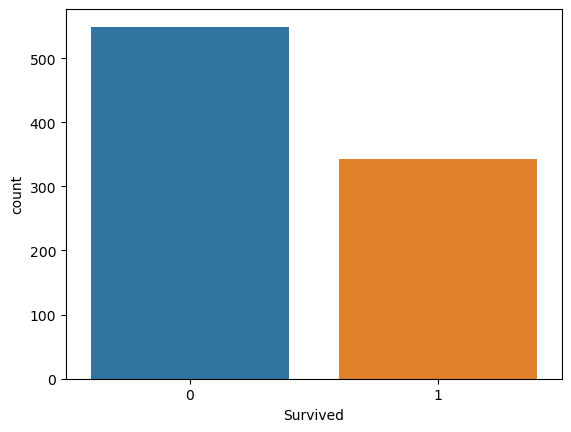

In [10]:
sns.countplot(df['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

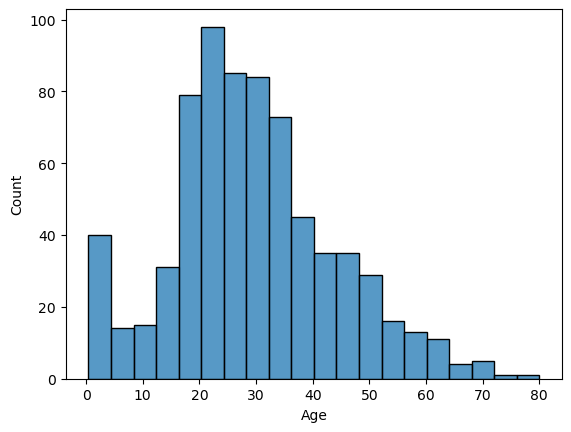

In [11]:
sns.histplot(df['Age'])

In [12]:
df['Age'].skew()

0.38910778230082704

In [13]:
mean_age=df['Age'].mean()

In [14]:
df['Age']=df['Age'].fillna(mean_age)

In [15]:
mode_embarked=df['Embarked'].mode()[0]
mode_embarked

'S'

In [16]:
df['Embarked']=df['Embarked'].fillna(mode_embarked)

In [17]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
df2=df.drop('Cabin',axis=1)

In [19]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)


In [21]:
df['Embarked'].mode()[0]

1

In [22]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
197/891

0.22109988776655443

##KNN

##DecisionTreeClassifier

# 5. Check and handle outliers 

In [24]:
z_score_Age=np.abs(stats.zscore(df['Age']))
z_score_Age

0      0.592481
1      0.638789
2      0.284663
3      0.407926
4      0.407926
         ...   
886    0.207709
887    0.823344
888    0.000000
889    0.284663
890    0.177063
Name: Age, Length: 891, dtype: float64

In [25]:
z_score_Survived=np.abs(stats.zscore(df['Survived']))
z_score_Survived

0      0.789272
1      1.266990
2      1.266990
3      1.266990
4      0.789272
         ...   
886    0.789272
887    1.266990
888    0.789272
889    1.266990
890    0.789272
Name: Survived, Length: 891, dtype: float64

In [26]:
z_score_Fare=np.abs(stats.zscore(df['Fare']))
z_score_Fare

0      0.502445
1      0.786845
2      0.488854
3      0.420730
4      0.486337
         ...   
886    0.386671
887    0.044381
888    0.176263
889    0.044381
890    0.492378
Name: Fare, Length: 891, dtype: float64

In [27]:
out_index_Age=np.where(z_score_Age>3)
print(out_index_Age[0])

[ 96 116 493 630 672 745 851]


In [28]:
df=df.drop(out_index_Age[0])
df.shape

(884, 12)

In [29]:
out_index_Survived=np.where(z_score_Survived>3)
print(out_index_Survived[0])

[]


In [30]:
z_score_SibSp=np.abs(stats.zscore(df['SibSp']))
z_score_SibSp

0      0.428741
1      0.428741
2      0.475811
3      0.428741
4      0.475811
         ...   
886    0.475811
887    0.475811
888    0.428741
889    0.475811
890    0.475811
Name: SibSp, Length: 884, dtype: float64

In [31]:
(z_score_SibSp>3).to_numpy()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,

In [32]:
out_index_SibSp=np.where(z_score_SibSp>3)
out_index_SibSp


(array([ 16,  50,  59,  68,  71, 117, 157, 162, 169, 178, 180, 199, 231,
        259, 264, 276, 322, 384, 478, 538, 539, 678, 681, 781, 786, 807,
        818, 840, 844, 856], dtype=int64),)

In [33]:
df=df.drop(df.iloc[out_index_SibSp].index)

In [34]:
z_score_Parch=np.abs(stats.zscore(df['Parch']))
z_score_Parch

0      0.433481
1      0.433481
2      0.433481
3      0.433481
4      0.433481
         ...   
886    0.433481
887    0.433481
888    2.137304
889    0.433481
890    0.433481
Name: Parch, Length: 854, dtype: float64

In [35]:
out_index_Parch=np.where(z_score_Parch>3)
out_index_Parch

(array([ 13,  24,  81, 157, 341, 417, 418, 543, 586, 613, 652, 708, 745,
        822, 848], dtype=int64),)

In [36]:
df=df.drop(df.iloc[out_index_Parch].index)

In [38]:
df.shape

(839, 12)

In [39]:
out_index_Fare=np.where(z_score_Fare>3)
print(out_index_Fare[0])

[ 27  88 118 258 299 311 341 377 380 438 527 557 679 689 700 716 730 737
 742 779]


In [40]:
df=df.drop(df.iloc[out_index_Fare].index)

In [41]:
df.shape

(819, 12)

In [47]:
df.Sex.replace(['male', 'female'], [1,0], inplace=True)

In [48]:
X = np.array(df.filter(['Pclass','Sex','Embarked','Family','Age'], axis=1))

In [49]:
y = np.array(df.filter(['Survived'], axis=1))

No outliers

In [50]:
X_1, X_test, y_1, y_test = train_test_split(X,y, test_size=0.3)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

In [51]:
final_scores = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))


 CV accuracy for k=1 is 75

 CV accuracy for k=3 is 73

 CV accuracy for k=5 is 75

 CV accuracy for k=7 is 73

 CV accuracy for k=9 is 73

 CV accuracy for k=11 is 72

 CV accuracy for k=13 is 70

 CV accuracy for k=15 is 68

 CV accuracy for k=17 is 69

 CV accuracy for k=19 is 69

 CV accuracy for k=21 is 73

 CV accuracy for k=23 is 71

 CV accuracy for k=25 is 68

 CV accuracy for k=27 is 66

 CV accuracy for k=29 is 65


E:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
E:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

In [52]:
optimal_k = final_scores.index(max(final_scores))
print(optimal_k)

2


In [57]:
# Importing C-Support Vector Classification from scikit-learn
from sklearn.svm import SVC

# Declaring the SVC with no tunning
classifier = SVC()

# Fitting the data. This is where the SVM will learn
classifier.fit(X_tr, y_tr)

# Predicting the result and giving the accuracy
score = classifier.score(X_cv, y_cv)

print(score)

0.6453488372093024


E:\Conda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
